# Examing Well File for Teapot Dome Field, Natrona County, Wyoming

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# SET GLOBAL STYLE PARAMETERS
plt.style.use('ggplot') # This is a global setting
plt.rcParams["figure.figsize"]=6,4  #10 x 8 is default figure size in Jupyter Notebook

### Import and Examine Well Header Data
- API Number should be a character variable and the same length
- Do the spud dates look reasonable?
- Do the Datum Elevations look reasonable?
- Are there any duplicate API Number?

In [2]:
# Read Data from local drive
# df = pd.read_csv('/Users/davidadvocate/Documents/Python/Data/sE1 Well Headers.csv')
# df.info()

# df.describe().astype(int)

In [3]:
# Read EX 1 CSV Data from Github site
import requests
import io
    
# Downloading the csv file from your GitHub account
# To get the url, click on the CSV file in your Github site,
# then click the raw button. Copy the like into the line below the points to the url:

url = "https://raw.githubusercontent.com/dmadvoc/Petroleum-Geology-Analyses/main/sE1%20Well%20Headers.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

df = pd.read_csv(io.StringIO(download.decode('utf-8')))

df.describe().astype(int)

,API Number,Northing,Easting,Total Depth,Datum Elevation,Ground Elevation,Plugback Depth
count,1317,1317,1317,1310,1317,1263,221
mean,490251282775,958516,801571,1728,5160,5126,1160
std,535709,6898,3904,1359,77,816,1012
min,490250631800,939759,789514,180,4921,0,0
25%,490251055400,953898,800232,566,5120,5115,467
50%,490251093000,957241,802307,1004,5170,5163,750
75%,490251130600,962286,803880,2853,5205,5199,1537
max,490256012901,979507,809092,6864,5524,17181,5411


### What is the lenght of the API Number - are they all the same?

In [4]:
df['WLBR_ID'] =df['API Number'].astype(str) # Create WLBR_ID as a string
df['LEN'] = df['WLBR_ID'].str.len()         # Creat LEN as the lenght of the WLBR_ID string 
display(df.head(2))                        # Need to use the display() with muliple printing commands 
df['LEN'].describe()                       # ANSWER: ALL WLBR_ID HAVE A LENGHT OF 12 


,API Number,Operator,Well Name,Well Number,Northing,Easting,Well Status,Class,Total Depth,Datum Elevation,...,Ground Elevation,Plugback Depth,Spud Date,Completion Date,Common Well Name,Legal Survey Type,Location,Geog. Proj.,WLBR_ID,LEN
0,490251039700,U.S. DOE,NPR-3,34-A-21,974652.3,794810.9,PA,I,2914.0,4921.0,...,4911.0,NaN,1977-07-08,NaN,34-A-21,CONGRESS,TWP: 39 N - Range: 78 W - Sec. 21,All Coordinates in Wyoming East Central State ...,490251039700,12
1,490250631800,U.S. DOE,NPR-3,82-S-14,950092.0,808959.2,PR,O,1286.0,5293.0,...,5288.0,NaN,1962-07-04,7/6/62,82-S-14,CONGRESS,TWP: 38 N - Range: 78 W - Sec. 14,All Coordinates in Wyoming East Central State ...,490250631800,12


count    1317.0
mean       12.0
std         0.0
min        12.0
25%        12.0
50%        12.0
75%        12.0
max        12.0
Name: LEN, dtype: float64

### Are there any sidtrack wells?
- The last two digits of the WLBR_ID string designates the sidtrack for older 12 digit WLBR_IDs.
- New WLBR_IDs have 14 digits, with an event sequence appended
- Find the records that are sidetracks, i.e. not equal '00'
#### Interpreting API Number:
        State CD, County CD, Unique Well ID, Side Track, Event Sequence CD
          XX        XXX          XXXXX          XX             XX           e.g., 49-025-23195-00-00

In [5]:
df['ST'] = df['WLBR_ID'].str[-2:]                 # Strip last two digits of a text string
#df['ST'] = df['WLBR_ID'].str.strip().str[-1]     # Strip last digit of a text string
Side_Track=df.loc[df ['ST'] != '00']              # DataFrame contain only wells with side tracks
#Side_Track.describe().astype(int)                # Statistics as intergers
Side_Track[['WLBR_ID', 'ST']].count()             # Report number of Side Track Wells

WLBR_ID    18
ST         18
dtype: int64

### Look for Duplicate Unique WLBR_ID

In [6]:
Duplicate = df[df.duplicated('WLBR_ID')]  # Looks for duplicates of a single variable
#Duplicate = df[df.duplicated(0)]         # Looks for duplicates record
print(Duplicate)

Empty DataFrame
Columns: [API Number, Operator, Well Name, Well Number, Northing, Easting, Well Status, Class, Total Depth, Datum Elevation, Datum Type, State, County, Country, Field, Basin, Lease Name, Ground Elevation, Plugback Depth, Spud Date, Completion Date, Common Well Name, Legal Survey Type, Location, Geog. Proj., WLBR_ID, LEN, ST]
Index: []

[0 rows x 28 columns]


### Examine Spud Dates
- Pandas imports CSV or Excel dates as objects, aka string with format: YYYY-MM-DD
- Make sure your CSV or Excel file have 4 digit years!
- Pandas DateTime function can convert strings to a Dtype DateTime if needed


### Convert Spud Date to Decades for charting

In [7]:
df['Decade']= df['Spud Date'].str[0:3] + '0'                       # Convert Spud Date string to decade
cnt = df['Decade'].value_counts()                                  # Get a count of the decades   
cnt = cnt.to_frame()                                               # Convert cnt to a DataFrame
cnt.reset_index(inplace=True)                                      # Convert the index to a DataFrame column
cnt = cnt.rename(columns = {'index':'Decade', 'Decade': 'Count'})  # Rename the columns
cnt.sort_values(by=['Decade'], inplace=True, ascending=True)       # Sort the DataFrame by decades for charting
print(cnt)


  Decade  Count
7   1910      2
4   1920     81
6   1950     13
3   1960    115
1   1970    376
0   1980    456
2   1990    236
5   2000     24


### Bar Chart of Spud Year by decade

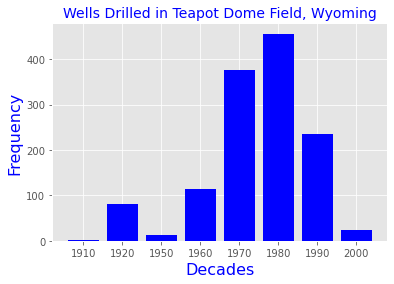

In [8]:
plt.bar(cnt['Decade'], cnt['Count'], width=.8, color='b')
plt.title('Wells Drilled in Teapot Dome Field, Wyoming', fontsize=14, color='blue')
plt.xlabel('Decades', fontsize=16, color='blue')
plt.ylabel('Frequency', fontsize=16, color="blue")
plt.show()

### Make an map of surface elevation

AttributeError: 'Series' object has no attribute 'clabel'

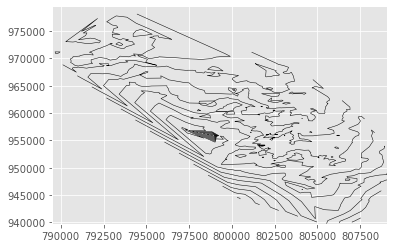

In [11]:
plt.tricontour(df['Easting'], df['Northing'], df['Datum Elevation'], 15, linewidths=0.5, colors='k')
plt.clabel(df['Datum Elevation'], 15)
plt.scatter(df['Easting'], df['Northing'], c=df['Datum Elevation'], label="Elevation", s=10, cmap='RdYlBu')
plt.colorbar()
plt.title('Datum Elevation, Teapot Dome Field, Wyoming', fontsize=14, color='blue')
plt.xlabel('Easting', fontsize=16, color='blue')
plt.ylabel('Northing', fontsize=16, color="blue")
plt.show()
